Dataset Shape: (200, 5)
Missing Values: CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Duplicate Entries: 0
Data Types:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
Summary Statistics:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000      

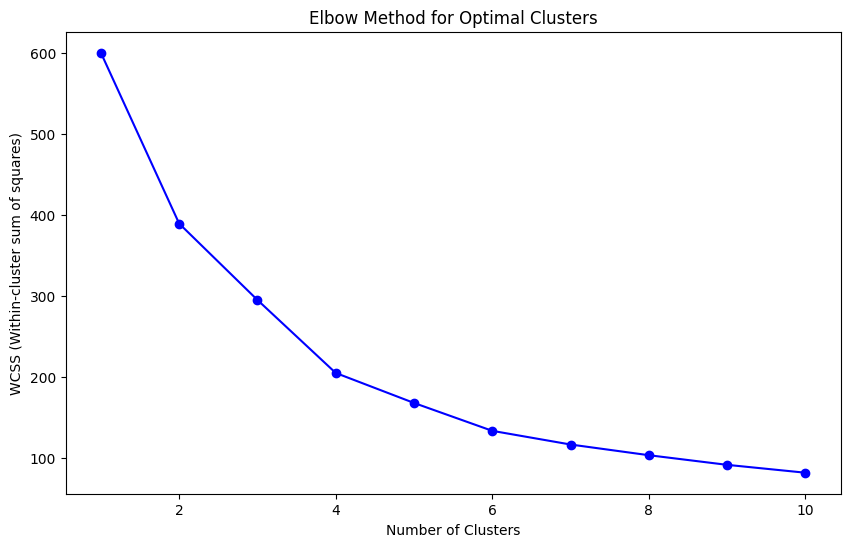

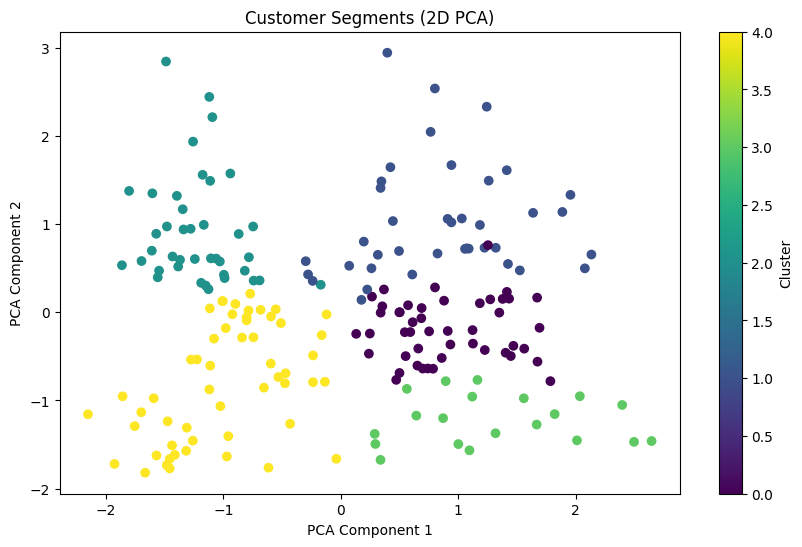

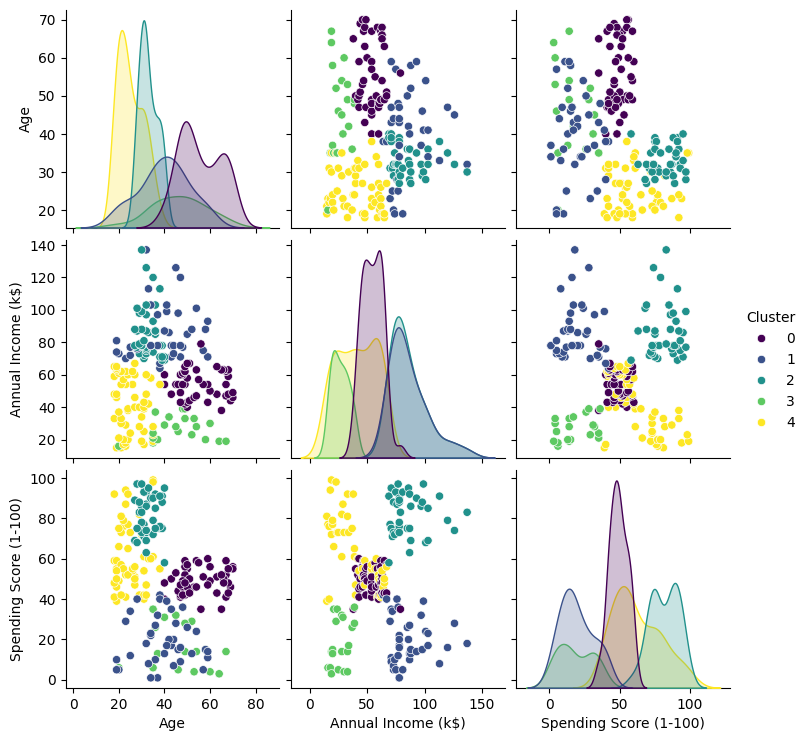

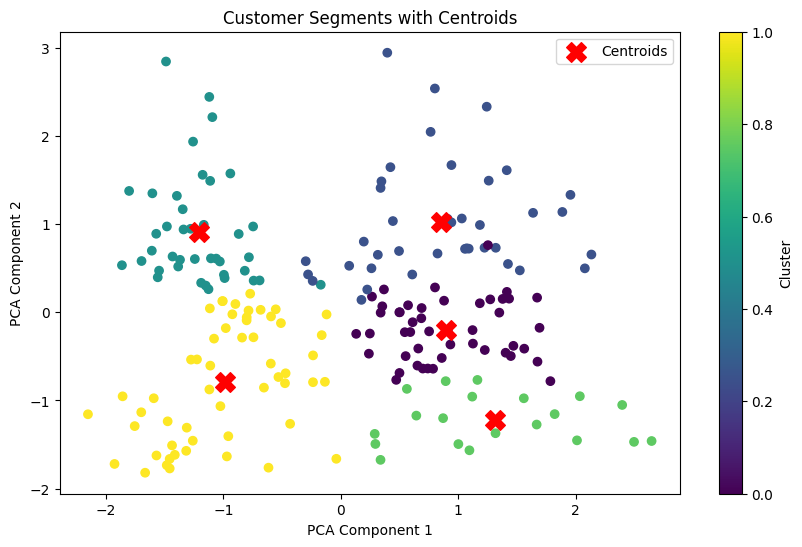

Silhouette Score: 0.417
Cluster 0 Summary:
             Age  Annual Income (k$)  Spending Score (1-100)
count  47.000000           47.000000               47.000000
mean   55.638298           54.382979               48.851064
std     8.913657            8.818344                6.303825
min    40.000000           38.000000               35.000000
25%    49.000000           47.500000               44.500000
50%    54.000000           54.000000               48.000000
75%    65.000000           62.000000               54.000000
max    70.000000           79.000000               60.000000

Cluster 1 Summary:
             Age  Annual Income (k$)  Spending Score (1-100)
count  39.000000           39.000000               39.000000
mean   39.871795           86.102564               19.358974
std    10.938054           16.725013               11.610991
min    19.000000           64.000000                1.000000
25%    34.000000           74.500000               10.500000
50%    41.000000      

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Step 1: Load the Dataset
# Load dataset
df = pd.read_csv(r'D:\muzakkir\Data Analysis\Dataset\Task 3\customers.csv')


# Inspect the dataset
print("Dataset Shape:", df.shape)
print("Missing Values:", df.isnull().sum())
print("Duplicate Entries:", df.duplicated().sum())
print("Data Types:\n", df.dtypes)
print("Summary Statistics:\n", df.describe())

# Step 2: Data Preprocessing
# Select relevant columns for clustering
df_selected = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Step 3: Clustering (Finding Optimal Number of Clusters)

# Use the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

# Step 4: K-Means Clustering with optimal clusters (say, 5 from the elbow plot)
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Step 5: Visualization
# Apply PCA for dimensionality reduction to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Create a 2D scatter plot
plt.figure(figsize=(10,6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segments (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Pair plot to visualize relationships between features within clusters
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']], hue='Cluster', palette='viridis')
plt.show()

# Visualize the centroids of the clusters
centroids = pca.transform(kmeans.cluster_centers_)
plt.figure(figsize=(10,6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('Customer Segments with Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

# Step 6: Additional Insights

# Print Silhouette Score to evaluate clustering
sil_score = silhouette_score(df_scaled, df['Cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

# Provide recommendations based on clusters
for i in range(5):
    cluster = df[df['Cluster'] == i]
    print(f"Cluster {i} Summary:")
    print(cluster[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].describe())
    print()

# Add 'Cluster' label to the original dataset
df.to_csv('segmented_customer_data.csv', index=False)

print("Customer segmentation completed and results saved in 'segmented_customer_data.csv'.")
